We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import numpy as np

In [35]:
data=pd.read_csv(r'C:/Users/oshav/DAFT_NOV_21_01/module_2/Lab_21_Time_Series_Models/airlines_passengers.csv')

Let’s display the first five rows of data

In [36]:
data.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [37]:
data.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [38]:
data["Month"]=pd.to_datetime(data['Month'])

The next thing we can do is convert the month column to an index. 


In [39]:
data=data.set_index('Month')

In [40]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

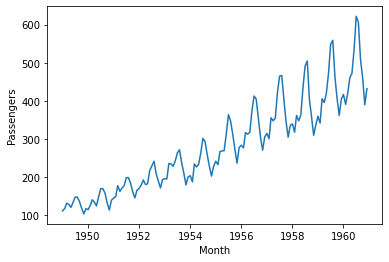

In [45]:
sns.lineplot(data=data, x=data.index, y="Passengers")

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [47]:
result = adfuller(data["Passengers"])
print(result)
print(': %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])
"""
Data is non stationary since we accepted H0 hypothesis"""


(0.8153688792060488, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)
: 0.82
5% Critical Value: -2.88
p-value: 0.99


'\nData is stationary since we rejected H0 hypothesis'

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [68]:
dftest=adfuller(data,autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

Store our results in a dataframe display it

Explain the results

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

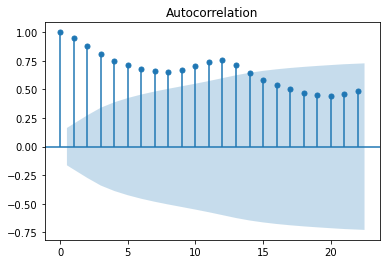

In [70]:
plot_acf(data['Passengers'])
plt.show()

Calculate partial autocorrelation

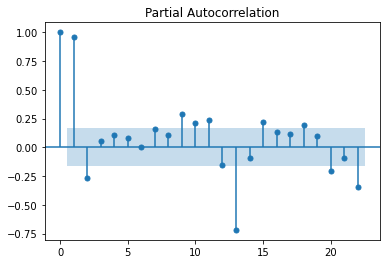

In [71]:

plot_pacf(data['Passengers'])
plt.show()

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


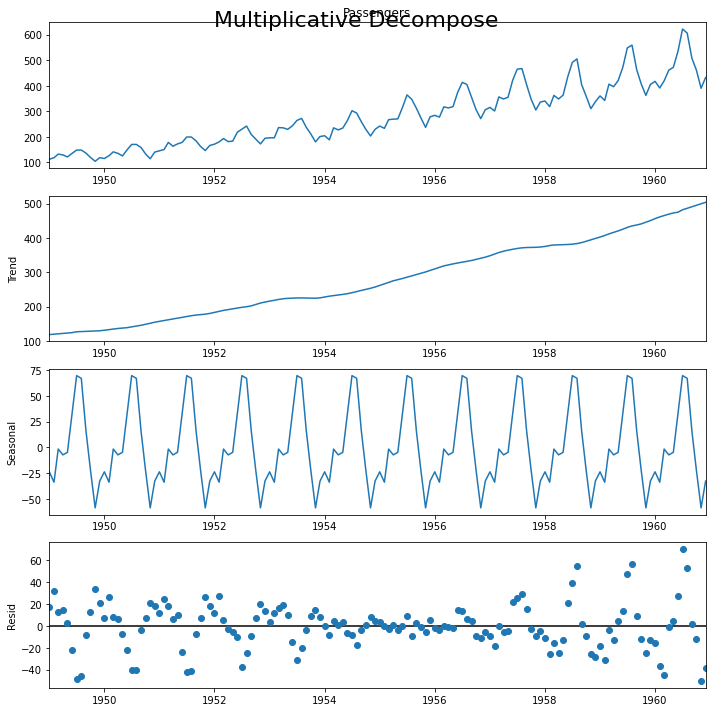

In [73]:
result_mul = seasonal_decompose(data['Passengers'],  extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

plt.show()


Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [86]:
df1 = data['Passengers'].apply(np.log)
df1 = np.log(data['Passengers']) # equivalent

In [88]:
df1=pd.DataFrame(df1)
df1

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [89]:
result1 = adfuller(df1["Passengers"])
print(result)
print(': %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])
"""
data now is stationary


(0.8153688792060488, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.6929308390189)
: 0.82
5% Critical Value: -2.88
p-value: 0.99


MA(1)

In [100]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df1, order=(0,1))
result = model.fit()
print(result.summary())


                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(0, 1)   Log Likelihood                  -0.438
Method:                       css-mle   S.D. of innovations              0.241
Date:                Tue, 18 Jan 2022   AIC                              6.876
Time:                        18:41:19   BIC                             15.786
Sample:                    01-01-1949   HQIC                            10.497
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5416      0.039    142.454      0.000       5.465       5.618
ma.L1.Passengers     0.9448      0.023     41.418      0.000       0.900       0.990
                            

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Display the output

MA(2)

In [101]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df1, order=(0,2))
result2 = model.fit()

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

Display the output

In [98]:
print(result2.summary())

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(0, 0)   Log Likelihood                 -86.080
Method:                           css   S.D. of innovations              0.440
Date:                Tue, 18 Jan 2022   AIC                            176.160
Time:                        18:39:52   BIC                            182.100
Sample:                    01-01-1949   HQIC                           178.574
                         - 12-01-1960                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5422      0.037    151.177      0.000       5.470       5.614


AR(2)

In [103]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df1, order=(2,0))
result3 = model.fit()
print(result3.summary())

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(2, 0)   Log Likelihood                 120.641
Method:                       css-mle   S.D. of innovations              0.104
Date:                Tue, 18 Jan 2022   AIC                           -233.283
Time:                        18:42:49   BIC                           -221.403
Sample:                    01-01-1949   HQIC                          -228.456
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5050      0.255     21.565      0.000       5.005       6.005
ar.L1.Passengers     1.1933      0.081     14.698      0.000       1.034       1.352
ar.L2.Passengers    -0.2224 

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARMA (?,?)

In [104]:
model = ARMA(df1, order=(2,1))
result4 = model.fit()
print(result4.summary())

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(2, 1)   Log Likelihood                 124.337
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 18 Jan 2022   AIC                           -238.673
Time:                        18:43:12   BIC                           -223.824
Sample:                    01-01-1949   HQIC                          -232.639
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4998      0.291     18.922      0.000       4.930       6.069
ar.L1.Passengers     0.4090      0.133      3.084      0.002       0.149       0.669
ar.L2.Passengers     0.5472 

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Display the output

ARIMA(?,?)

In [105]:
model = ARMA(df1, order=(2,1,1))
result4 = model.fit()
print(result4.summary())

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     ARMA(2, 1)   Log Likelihood                 124.337
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 18 Jan 2022   AIC                           -238.673
Time:                        18:44:22   BIC                           -223.824
Sample:                    01-01-1949   HQIC                          -232.639
                         - 12-01-1960                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4998      0.291     18.922      0.000       4.930       6.069
ar.L1.Passengers     0.4090      0.133      3.084      0.002       0.149       0.669
ar.L2.Passengers     0.5472 

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [109]:
from statsmodels.tools.eval_measures import rmse
rmse_MA1 = rmse(model,result1)
rmse_MA1

TypeError: unsupported operand type(s) for -: 'ARMA' and 'float'

Calculate AIC